# IBM Capstone Course Project - Report

## 1. Introduction/Business Problem

### 1.1 Introduction (Background)

Early in my career, I relocated to several cities while pursuing employment opportunities. While I thought of these travels as adventures, I was concerned with the challenge of finding housing in a neighborhood that provided a suitable environment, similar to the one I had just left. The process of finding a new home where I enjoyed living was usually a hit or miss proposition, especially in larger cities that offered a multitude of residential choices.

Once I arrived in a city, I would usually find something that met my basic requirements, as typically my search window was small. As I had time to explore, I would eventually discover a place that I found not only satisfactory, but also pleasing. Unfortunately, this process was highly ineffective, as it could result in significantly higher relocation expenses, as what should have been only one move could easily evolve into at least two.

### 1.2 Business Problem

When relocating from one city to another, a person should have a resource available to help them find a residence in a neighborhood that offers a set of desired amenities similar to the one they left. This stage of the relocation process should be optimized for time-efficiency, offering a manageable selection of neighborhoods from which to choose. Unfortunately, when moving to a new city, a person may not be familiar with the area. This unfamiliarity often results in an inefficient use of one’s time and financial resources, as they become overwhelmed with choices which may or may not suite their needs. Also, the person may feel increasing levels of stress, as the time for finding a residence and the cost of temporary housing increase, leading them to perhaps make a suboptimal decision. Using the process outlined in this project, someone relocating to another city will be able to streamline their search for a new residence relatively quickly by reducing the number of choices to a manageable level while focusing on those neighborhoods that meet their requirements. In summary, this project addresses the question, “How do I travel to a new city and find a neighborhood in which to live that offers similar comforts and amenities to the one I left?”

### 1.3 Target Audience

This project is useful for two target audiences. This first audience is those who are moving from one city to another and desire to maintain a similar living condition with recognizable surroundings. They are seeking an efficient time/cost process for selecting their optimum neighborhood. (Note: this process assumes the individual wishes to seek a neighborhood like the one they are leaving.) The second audience is those real estate agents/relocation consultants who desire to offer a service that increases not only the efficiency by which their clients are able to relocate into a new city, but also their level of satisfaction with their new neighborhood. Developing such a list of satisfied customers will increase referrals and help their practice to flourish.

## 2. Data

### 2.1 Data Sources and Description

The data used in this project is derived from three different sources. For the purpose of this analysis, New York City serves as the originating location and the City of Toronto is the destination. 

#### 2.1.1 New York City Data

Data for New York City was initially downloaded from the NYU Spatial Data Repository and then housed on the course server for use in the Week 3 laboratory. The “newyork_data.json” file contains information for the City’s 5 boroughs and 306 neighborhoods, including the latitude and longitude coordinates for each neighborhood. The relevant data is contained in the features object with the borough and neighborhood values in the properties object and the latitude and longitude coordinates in the geometry object. This information is read into a pandas DataFrame that contains columns for “Borough,” “Neighborhood,” “Latitude,” and “Longitude.” See table below for an example. [The code for collecting the data and building the DateFrame may be found here.](https://github.com/MichaelMossPhD/Coursera_Capstone/blob/master/NYC%20Data.ipynb)

<table>
    <tr>
        <th>Borough</th>
        <th>Neighborhood</th>
        <th>Latitude</th>
        <th>Longitude</th>
    </tr>
     <tr>
        <th>Bronx</th>
        <th>Wakefield</th>
        <th>40.894705</th>
        <th>-73.847201</th>
    </tr>
    <tr>
        <th>Bronx</th>
        <th>Co-op City</th>
        <th>40.874294</th>
        <th>-73.829939</th>
    </tr>
    <tr>
        <th>Bronx</th>
        <th>Eastchester</th>
        <th>40.887556</th>
        <th>-73.827806</th>
    </tr>
     <tr>
        <th>Bronx</th>
        <th>Fieldston</th>
        <th>40.895437</th>
        <th>-73.905643</th>
    </tr>
     <tr>
        <th>Bronx</th>
        <th>Riverdale</th>
        <th>40.890834</th>
        <th>-73.912585</th>
    </tr>
</table>

#### 2.1.2 City of Toronto Data

Collecting data for the City of Toronto is a more complex endeavor. The raw data for Toronto’s neighborhoods is gathered from the “List of Postal Codes of Canada: M” Wikipedia page. Data from this page is scraped using BeautifulSoup4 with the lxml toolkit for processing XML and HTML. Data from each HTML table row in the “wikitable sortable” table class is read into a pandas DataFrame that contains columns for “Postcode,” “Borough,” and “Neighborhood.” After creating the DataFrame, the data is wrangled in four steps:
1. Rows having boroughs with the designation of “Not assigned” are removed.
2. Neighborhoods that share the same postal code are combined into one record with the neighborhoods separated with a comma.
3. If a record has a borough, but the neighborhood has the designation of “Not assigned,” the neighborhood has the same value as its borough. 
4. Values in the Neighborhood column with an extra character (“\n”) have it removed using the replace() method.

See table below for an example of the resulting DataFrame.

<table>
    <tr>
        <th>PostalCode</th>
        <th>Borough</th>
        <th>Neighborhood</th>
    </tr>
<tr>
        <th>M1B</th>
        <th>Scarborough</th>
        <th>Rouge, Malvern</th>
    </tr>
    <tr>
        <th>M1C</th>
        <th>Scarborough</th>
        <th>Highland Creek, Rouge Hill, Port Union</th>
    </tr>
     <tr>
        <th>M1E</th>
        <th>Scarborough</th>
        <th>Guildwood, Morningside, West Hill</th>
    </tr>
    <tr>
        <th>M1G</th>
        <th>Scarborough</th>
        <th>Woburn</th>
    </tr>
     <tr>
        <th>M1H</th>
        <th>Scarborough</th>
        <th>Cedarbrae</th>
    </tr>
</table>

However, the preceeding DataFrame does not contain the necessary latitude and longitude coordinates. This information was provided via an instructor furnished .csv file, Geospatial_Coordinates.csv. This data is merged with the original City of Toronto DataFrame. See table below for an example of the resulting DataFrame.

<table>
    <tr>
        <th>PostalCode</th>
        <th>Borough</th>
        <th>Neighborhood</th>
        <th>Latitude</th>
        <th>Longitude</th>
    </tr>
<tr>
        <th>M1B</th>
        <th>Scarborough</th>
        <th>Rouge, Malvern</th>
        <th>43.806686</th>
        <th>-79.194353</th>
    </tr>
    <tr>
        <th>M1C</th>
        <th>Scarborough</th>
        <th>Highland Creek, Rouge Hill, Port Union</th>
        <th>43.784535</th>
        <th>-79.160497</th>
    </tr>
     <tr>
        <th>M1E</th>
        <th>Scarborough</th>
        <th>Guildwood, Morningside, West Hill</th>
        <th>43.763573</th>
        <th>-79.188711</th>
    </tr>
     <tr>
        <th>M1G</th>
        <th>Scarborough</th>
        <th>Woburn</th>
        <th>43.770992</th>
        <th>-79.216917</th>
    </tr>
    <tr>
        <th>M1H</th>
        <th>Scarborough</th>
        <th>Cedarbrae</th>
        <th>43.773136</th>
        <th>-79.239476</th>
    </tr>
</table>

Finally, the Postcode column is removed, resulting in the same format structure as the DataFrame for New York City. See table below for an example of the resulting DataFrame.

<table>
    <tr>
        <th>Borough</th>
        <th>Neighborhood</th>
        <th>Latitude</th>
        <th>Longitude</th>
    </tr>
<tr>
        <th>Scarborough</th>
        <th>Rouge, Malvern</th>
        <th>43.806686</th>
        <th>-79.194353</th>
    </tr>
    <tr>
        <th>Scarborough</th>
        <th>Highland Creek, Rouge Hill, Port Union</th>
        <th>43.784535</th>
        <th>-79.160497</th>
    </tr>
     <tr>
        <th>Scarborough</th>
        <th>Guildwood, Morningside, West Hill</th>
        <th>43.763573</th>
        <th>-79.188711</th>
    </tr>
     <tr>
        <th>Scarborough</th>
        <th>Woburn</th>
        <th>43.770992</th>
        <th>-79.216917</th>
    </tr>
    <tr>
        <th>Scarborough</th>
        <th>Cedarbrae</th>
        <th>43.773136</th>
        <th>-79.239476</th>
    </tr>
</table>

[The code for collecting the data and building the DateFrame may be found here.](https://github.com/MichaelMossPhD/Coursera_Capstone/blob/master/Toronto%20Data.ipynb)

#### 2.1.3 FourSquare Data

Connecting to its database, the FourSquare API is used to explore neighborhoods in New York City and the City of Toronto. The resulting Jason files provide the following information regarding venues from each neighborhood:
- Venue Name (name)
- Category Name (categories)
- Venue Latitude (lat)
- Venue Longitude (lng)

The data is cleaned and stored in a DataFrame. See table below for an example.

<table>
    <tr>
        <th>name</th>
        <th>categories</th>
        <th>lat</th>
        <th>lng</th>
    </tr>
    <tr>
        <th>Eagle's Nest Golf Club</th>
        <th>Golf Course</th>
        <th>43.805455</th>
        <th>-79.364186</th>
    </tr>
    <tr>
        <th>AY Jackson Pool</th>
        <th>Pool</th>
        <th>43.804515</th>
        <th>-79.366138</th>
    </tr>
    <tr>
        <th>Villa Madina</th>
        <th>Mediterranean Restaurant</th>
        <th>43.801685</th>
        <th>-79.363938</th>
    </tr>
     <tr>
        <th>Duncan Creek Park</th>
        <th>Dog Run</th>
        <th>43.805539</th>
        <th>-79.360695</th>
    </tr>
</table>

This information is then merged with the DataFrames for New York City and the City of Toronto. The resulting DataFrames provide columns for each city’s neighborhoods, neighborhood latitudes, neighborhood longitudes, venues, venue latitudes, venue longitudes, and venue categories. See table below for an example.

<table>
    <tr>
        <th>Neighborhood</th>
        <th>Neighborhood Latitude</th>
        <th>Neighborhood Longitude</th>
        <th>Venue</th>
        <th>Venue Latitude</th>
        <th>Venue Longitude</th>
        <th>Category</th>
    </tr>
    <tr>
        <th>Hillcrest Village</th>
        <th>43.803762</th>
        <th>-79.363452</th>
        <th>Eagle's Nest Golf Club</th>
        <th>43.805455</th>
        <th>-79.364186</th>
        <th>Golf Course</th>
    </tr>
    <tr>
        <th>Hillcrest Village</th>
        <th>43.803762</th>
        <th>-79.363452</th>
        <th>AY Jackson Pool</th>
        <th>43.804515</th>
        <th>-79.366138</th>
        <th>Pool</th>
    </tr>
    <tr>
        <th>Hillcrest Village</th>
        <th>43.803762</th>
        <th>-79.363452</th>
        <th>Villa Madina</th>
        <th>43.801685</th>
        <th>-79.363938</th>
        <th>Mediterranean Restaurant</th>
    </tr>
    <tr>
        <th>Hillcrest Village</th>
        <th>43.803762</th>
        <th>-79.363452</th>
        <th>Duncan Creek Park</th>
        <th>43.805539</th>
        <th>-79.360695</th>
        <th>Dog Run</th>
    </tr>
    <tr>
        <th>Fairview, Henry Farm, Oriole</th>
        <th>43.778517</th>
        <th>-79.346556</th>
        <th>The LEGO Store</th>
        <th>43.778207</th>
        <th>-79.360695</th>
        <th>Toy / Game Store</th>
    </tr>
</table>

### 2.2 How the Data Will Be Used to Solve the Problem

Data pertaining to the boroughs of New York City and the City of Toronto will be used to identify their respective neighborhoods. Neighborhood coordinates will be used to locate them on a geographical map. The map of New Yok City will identify the location of the neighborhood that serves as the starting point for the subject’s relocation. The initial map of the City of Toronto will identify locations of potential neighborhoods in which the subject may reside. Eventually, the City of Toronto map will display color-coded neighborhoods, identifying those that meet the subject’s requirements.

Neighborhood data will be combined with FourSquare’s venue data to:
1. associate venues with a specific neighborhood
2. determine the number of unique categories in each neighborhood
3. gather a specified number of top venues within a given radius of a neighborhood, and
4. determine the number of venues returned for each neighborhood.

The collected data will then be processed to determine the mean and frequency of occurrence of each category for each neighborhood. The most common five venues for each neighborhood will be identified and sorted in descending order. Finally, a DataFrame will be created to store the top 10 most common venues for each neighborhood. The data from this DataFrame will be processed to cluster the neighborhoods, allowing for comparsion between the baseline neighborhood in New York City and those in the City of Toronto.

## 3. Methodology

Having collected and cleansed the data for New York City and the City of Toronto, this project moves into the analysis phase. The characteristics of the originating neighborhood (East Village) in New York City and the potential neighborhoods for relocation in the City of Toronto are examined. Then, k-means clustering is used to group the East Village neighborhood with those Toronto neighborhoods having similar characteristics. At the end of this process, the East Village with be assigned to a cluster of Toronto neighbors that are similar. These are the neighborhoods the subject should examine as possible relocation areas.

### 3.1 Analysis of East Village in New York City

Once the coordinates for New York City and the East Village have been identified, the FourSquare API is used to gather the top 100 venues that are within 500 meters of the neighborhood’s center. These venues are then assigned to categories along with their respective longitudes and latitudes. See table below for a partial listing.

<table>
    <tr>
        <th>Venue</th>
        <th>Venue Category</th>
        <th>lat</th>
        <th>lng</th>
    </tr>
    <tr>
        <th>Good Beer NYC</th>
        <th>Beer Store</th>
        <th>40.727643</th>
        <th>-73.983835</th>
    </tr>
    <tr>
        <th>Cafe Mogador</th>
        <th>Moroccan Restaurant</th>
        <th>40.727293</th>
        <th>-73.984517</th>
    </tr>
    <tr>
        <th>Kura</th>
        <th>Japanese Restaurant</th>
        <th>40.726803</th>
        <th>-73.983444</th>
    </tr>
     <tr>
        <th>Tompkins Square Park Dog Run</th>
        <th>Dog Run</th>
        <th>40.726482</th>
        <th>-73.981204</th>
    </tr>
    <tr>
        <th>Tompkins Square Bagels</th>
        <th>Bagel Shop</th>
        <th>40.728243</th>
        <th>-73.982127</th>
    </tr>
</table>

From this information, a map is drawn showing the East Village’s top venues and their locations.

In [19]:
from IPython.display import HTML
HTML('<a href="https://nbviewer.jupyter.org/github/MichaelMossPhD/Coursera_Capstone/blob/master/east_village_venues.html" target="_blank">Link to map of East Village venues.</a>')

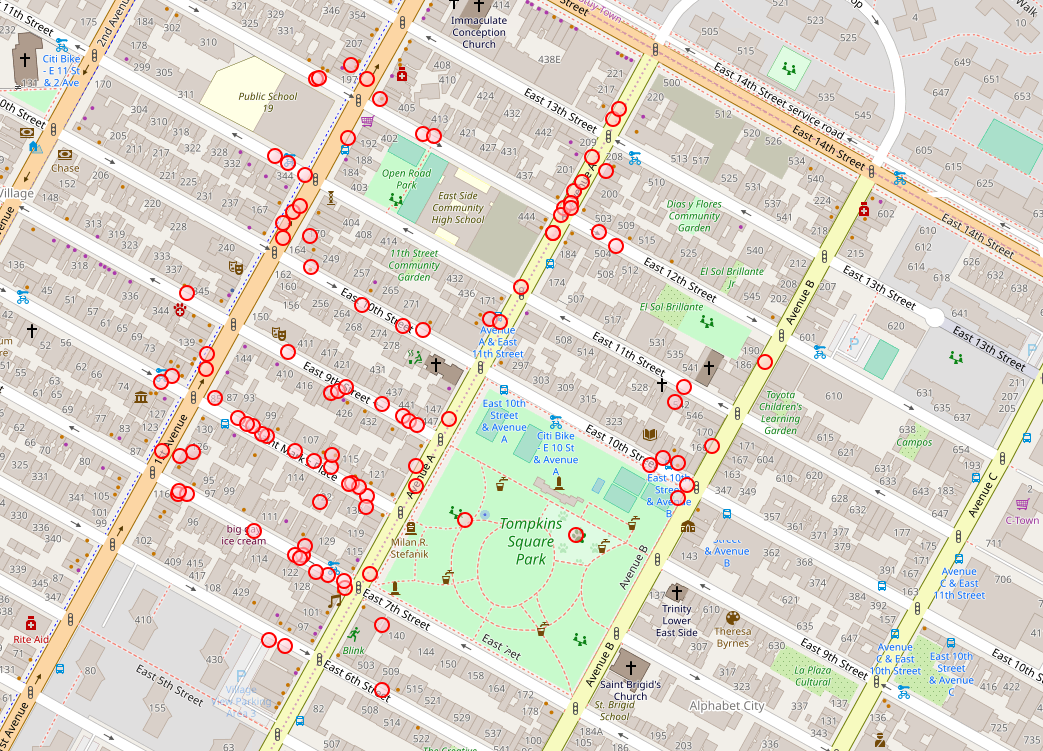

In [34]:
from IPython.display import Image
Image(filename='east_village_venues.png')

Once the neighborhood and venue information are combined into a single DataFrame, the number of venues in each category for the East Village is added. Next, the means are taken for the venue's occurrence in each category. [See code for these steps and their outputs here (new tab).](https://github.com/MichaelMossPhD/Coursera_Capstone/blob/master/IBM%20Capstone%20Project%20-%20Code.ipynb)From this result, the top 10 most common categories are determined. See the following table for the ranking of the top 10 East Village categories by frequency.

<table>
       <tr>
        <th>Venue Category</th>
        <th>Frequency</th>
    </tr>
    <tr>
        <th>Ice Cream Shop</th>
        <th>0.06</th>
    </tr>
    <tr>
        <th>Bar</th>
        <th>0.05</th>
    </tr>
    <tr>
        <th>Wine Bar</th>
        <th>0.05</th>
    </tr>
    <tr>
        <th>Cocktail Bar</th>
        <th>0.04</th>
    </tr>
     <tr>
        <th>Mexican Restaurant</th>
        <th>0.04</th>
    </tr>
    <tr>
        <th>Pizza Place</th>
        <th>0.03</th>
    </tr>
    <tr>
        <th>Chinese Restaurant</th>
        <th>0.03</th>
    </tr>
    <tr>
        <th>Ramen Restaurant</th>
        <th>0.03</th>
    </tr>
    <tr>
        <th>Speakeasy</th>
        <th>0.03</th>
    </tr>
    <tr>
        <th>Cafe / Record Shop</th>
        <th>0.02</th>
    </tr>
</table>

Finally, a new DataFrame is created to store the top 10 venue categories for the East Village. See table below.

<table>
    <tr>
        <th>Neighborhood</th>
        <th>1st Most Common Venue Category</th>
        <th>2nd Most Common Venue Category</th>
        <th>3rd Most Common Venue Category</th>
        <th>4th Most Common Venue Category</th>
        <th>5th Most Common Venue Category</th>
        <th>6th Most Common Venue Category</th>
        <th>7th Most Common Venue Category</th>
        <th>8th Most Common Venue Category</th>
        <th>9th Most Common Venue Category</th>
        <th>10th Most Common Venue Category</th>
    </tr>
    <tr>
        <th>East Village</th>
        <th>Ice Cream Shop</th>
        <th>Bar</th>
        <th>Bar	Wine Bar</th>
        <th>Cocktail Bar</th>
        <th>Mexican Restaurant</th>
        <th>Ramen Restaurant</th>
        <th>Speakeasy</th>
        <th>Pizza Place</th>
        <th>Chinese Restaurant</th>
        <th>Café</th>
    </tr>
</table>

### 3.2 Analysis of Neighborhoods in the City of Toronto

Analysis of the neighborhoods in Toronto follows the same procedure as that for the East Village in New York City, except all of the neighborhoods are included instead of just one.

Once the coordinates for the City of Toronto have been identified, they are used with the neighborhood coordinates captured earlier as a data source to create a map. See below for the map of Toronto with its neighborhoods.

In [20]:
HTML('<a href="https://nbviewer.jupyter.org/github/MichaelMossPhD/Coursera_Capstone/blob/master/toronto.html" target="_blank">Link to map of Toronto neighborhoods.</a>')

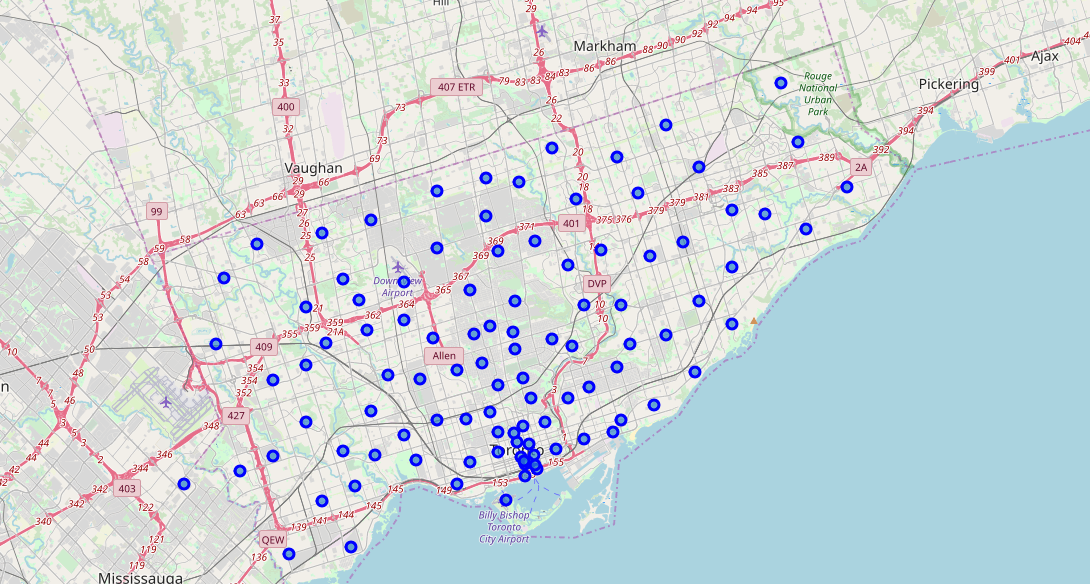

In [36]:
Image(filename='toronto.png')

The Foursquare API is utilized to explore and segment the neighborhoods in the City of Toronto. The neighborhood and venue data are combined into a DataFrame that lists the neighboorhoods with their latitudes and longitudes and their associated venues with their latitudes and longitudes, as weill as the venue categories. See the table below for a sample of the data.

<table>
    <tr>
        <th>Neighborhood</th>
        <th>Neighborhood Latitude</th>
        <th>Neighborhood Longitude</th>
        <th>Venue</th>
        <th>Venue Latitude</th>
        <th>Venue Longitude	</th>
        <th>Venue Category</th>
    </tr>
    <tr>
        <th>Rouge, Malvern</th>
        <th>43.806686</th>
        <th>-79.194353</th>
        <th>Wendy's</th>
        <th>43.807448</th>
        <th>-79.199056</th>
        <th>Fast Food Restaurant</th>
    </tr>
    <tr>
        <th>Highland Creek, Rouge Hill, Port Union</th>
        <th>43.784535</th>
        <th>-79.160497</th>
        <th>Royal Canadian Legion</th>
        <th>43.782533</th>
        <th>-79.163085</th>
        <th>Bar</th>
    </tr>
    <tr>
        <th>Guildwood, Morningside, West Hill</th>
        <th>43.763573</th>
        <th>-79.188711</th>
        <th>Swiss Chalet Rotisserie & Grill</th>
        <th>43.767697</th>
        <th>-79.189914</th>
        <th>Pizza</th>
    </tr>
    <tr>
        <th>Guildwood, Morningside, West Hill</th>
        <th>43.763573</th>
        <th>-79.188711</th>
        <th>G & G Electronics</th>
        <th>43.765309</th>
        <th>-79.191537</th>
        <th>Electronics Store</th>
    </tr>
    <tr>
        <th>Guildwood, Morningside, West Hill</th>
        <th>43.763573</th>
        <th>-79.188711</th>
        <th>Big Bite Burrito</th>
        <th>43.766299</th>
        <th>-79.190720</th>
        <th>Mexican Restaurant</th>
    </tr>
</table>

As before, the number of venues in each category for the Toronto neighborhoods is added. Next, the means are taken for the venue's occurrence in each category. From this result, the top 10 most common categories are determined (showing top 5 for this example). See the following table for a sample of the rankings of neighborhood venue categories by frequency.

<table>
    <tr>
        <th>Adelaide, King, Richmond</th>
    </tr>
    <tr>
        <th>Venue Category</th>
        <th>Frequency</th>
    </tr>
    <tr>
        <th>Coffee Shop</th>
        <th>0.06</th>
    </tr>
    <tr>
        <th>Café</th>
        <th>0.05</th>
    </tr>
    <tr>
        <th>Thai Restaurant</th>
        <th>0.04</th>
    </tr>
    <tr>
        <th>American Restaurant</th>
        <th>0.04</th>
    </tr>
    <tr>
        <th>Steakhouse</th>
        <th>0.04</th>
    </tr>
    <tr>
        <th>Agincourt</th>
    </tr>
    <tr>
        <th>Venue Category</th>
        <th>Frequency</th>
    </tr>
    <tr>
        <th>Skating Rink</th>
        <th>0.25</th>
    </tr>
    <tr>
        <th>Breakfast Spot</th>
        <th>0.25</th>
    </tr>
    <tr>
        <th>Lounge</th>
        <th>0.25</th>
    </tr>
    <tr>
        <th>Clothing Store</th>
        <th>0.25</th>
    </tr>
    <tr>
        <th>Miscellaneous Shop</th>
        <th>0.00</th>
    </tr>
</table>

As before, a dataframe is created to store and display the top 10 venues for each neighborhood. See table below for a sample of the data.

<table>
    <tr>
        <th>Neighborhood</th>
        <th>1st Most Common Venue Category</th>
        <th>2nd Most Common Venue Category</th>
        <th>3rd Most Common Venue Category</th>
        <th>4th Most Common Venue Category</th>
        <th>5th Most Common Venue Category</th>
        <th>6th Most Common Venue Category</th>
        <th>7th Most Common Venue Category</th>
        <th>8th Most Common Venue Category</th>
        <th>9th Most Common Venue Category</th>
        <th>10th Most Common Venue Category</th>
    </tr>
    <tr>
        <th>Adelaide, King, Richmond</th>
        <th>Coffee Shop</th>
        <th>Café</th>
        <th>American Restaurant</th>
        <th>Steakhouse</th>
        <th>Thai Restaurant</th>
        <th>Asian Restaurant</th>
        <th>Bar</th>
        <th>Restaurant</th>
        <th>Bakery</th>
        <th>Gym</th>
    </tr>
    <tr>
        <th>Agincourt</th>
        <th>Lounge</th>
        <th>Clothing Store</th>
        <th>Skating Rink</th>
        <th>Breakfast Spot</th>
        <th>Yoga Studio</th>
        <th>Dumpling Restaurant</th>
        <th>Discount Store</th>
        <th>Dog Run</th>
        <th>Doner Restaurant</th>
        <th>Donut Shop</th>
    </tr>
    <tr>
        <th>Agincourt North, L'Amoreaux East, Milliken, St...</th>
        <th>Playground</th>
        <th>Park</th>
        <th>Yoga Studio</th>
        <th>Drugstore</th>
        <th>Dim Sum Restaurant</th>
        <th>Diner</th>
        <th>Discount Store</th>
        <th>Dog Run</th>
        <th>Doner Restaurant</th>
        <th>Donut Shop</th>
    </tr>
    <tr>
        <th>Albion Gardens, Beaumond Heights, Humbergate, ...</th>
        <th>Grocery Store</th>
        <th>Pharmacy</th>
        <th>Fried Chicken Joint</th>
        <th>Coffee Shop</th>
        <th>Pizza Place</th>
        <th>Sandwich Place</th>
        <th>Beer Store</th>
        <th>Fast Food Restaurant</th>
        <th>Video Store</th>
        <th>Gluten-free Restaurant</th>
    </tr>
     <tr>
        <th>Alderwood, Long Branch</th>
        <th>Pizza Place</th>
        <th>Pharmacy</th>
        <th>Gym	</th>
        <th>Coffee Shop</th>
        <th>Skating Rink</th>
        <th>Sandwich Place</th>
        <th>Pub</th>
        <th>Dog Run</th>
        <th>Dessert Shop</th>
        <th>Dim Sum Restaurant</th>
    </tr>
</table>

Before further analysis is conducted, the East Village DataFrame is added to this one. This insertion allows the East Village to be included in a cluster with the Toronto neighborhoods. In this manner, the East Village neighborhood will be associated with similar Toronto neighborhoods. See table below showing the addition of venue categories for the East Village.

<table>
    <tr>
        <th>Neighborhood</th>
        <th>1st Most Common Venue Category</th>
        <th>2nd Most Common Venue Category</th>
        <th>3rd Most Common Venue Category</th>
        <th>4th Most Common Venue Category</th>
        <th>5th Most Common Venue Category</th>
        <th>6th Most Common Venue Category</th>
        <th>7th Most Common Venue Category</th>
        <th>8th Most Common Venue Category</th>
        <th>9th Most Common Venue Category</th>
        <th>10th Most Common Venue Category</th>
    </tr>
     <tr>
        <th>East Village</th>
        <th>Ice Cream Shop</th>
        <th>Bar</th>
        <th>Wine Bar</th>
        <th>Cocktail Bar</th>
        <th>Mexican Restaurant</th>
        <th>Ramen Restaurant</th>
        <th>Speakeasy</th>
        <th>Pizza Place</th>
        <th>Chinese Restaurant</th>
        <th>Café</th>
    </tr>
    <tr>
        <th>Adelaide, King, Richmond</th>
        <th>Coffee Shop</th>
        <th>Café</th>
        <th>American Restaurant</th>
        <th>Steakhouse</th>
        <th>Thai Restaurant</th>
        <th>Asian Restaurant</th>
        <th>Bar</th>
        <th>Restaurant</th>
        <th>Bakery</th>
        <th>Gym</th>
    </tr>
    <tr>
        <th>Agincourt</th>
        <th>Lounge</th>
        <th>Clothing Store</th>
        <th>Skating Rink</th>
        <th>Breakfast Spot</th>
        <th>Yoga Studio</th>
        <th>Dumpling Restaurant</th>
        <th>Discount Store</th>
        <th>Dog Run</th>
        <th>Doner Restaurant</th>
        <th>Donut Shop</th>
    </tr>
    <tr>
        <th>Agincourt North, L'Amoreaux East, Milliken, St...</th>
        <th>Playground</th>
        <th>Park</th>
        <th>Yoga Studio</th>
        <th>Drugstore</th>
        <th>Dim Sum Restaurant</th>
        <th>Diner</th>
        <th>Discount Store</th>
        <th>Dog Run</th>
        <th>Doner Restaurant</th>
        <th>Donut Shop</th>
    </tr>
    <tr>
        <th>Albion Gardens, Beaumond Heights, Humbergate, ...</th>
        <th>Grocery Store</th>
        <th>Pharmacy</th>
        <th>Fried Chicken Joint</th>
        <th>Coffee Shop</th>
        <th>Pizza Place</th>
        <th>Sandwich Place</th>
        <th>Beer Store</th>
        <th>Fast Food Restaurant</th>
        <th>Video Store</th>
        <th>Gluten-free Restaurant</th>
    </tr>
     <tr>
        <th>Alderwood, Long Branch</th>
        <th>Pizza Place</th>
        <th>Pharmacy</th>
        <th>Gym	</th>
        <th>Coffee Shop</th>
        <th>Skating Rink</th>
        <th>Sandwich Place</th>
        <th>Pub</th>
        <th>Dog Run</th>
        <th>Dessert Shop</th>
        <th>Dim Sum Restaurant</th>
    </tr>
</table>

### 3.3 Machine Learning Approach

This analysis utilizes the k-means machine learning algorithm to segment the neighborhoods into similar clusters. This approach was taken because k-means is an unsupervised method for separating data points into homogeneous clusters, which in this case means putting neighborhoods into groups based upon their similarity. This analysis uses an unsupervised approach because a specific hypothesis is not being tested. The data is telling its own story. For this analysis, the value of k is 6.

## 4. Results

Based upon the results from using k-means, a new data frame was created that combines similar neighborhoods into clusters with their top 10 venue categories. A review of these clusters reveals that the East Village has been placed into cluster number 5. See table below for those Toronto neighborhoods that are also in this cluster.

In [21]:
HTML('<a href="https://nbviewer.jupyter.org/github/MichaelMossPhD/Coursera_Capstone/blob/master/cluster_5.html" target="_blank">Link to Cluster 5 table.</a>')

To visualize the results, the East Village record is removed from the DataFrame, as to only identify Toronto neighborhoods and the City of Toronto is redrawn with color-coded neighborhood clusters. The 62 neighborhoods in cluster 5 are identified by the color orange. These are the potential relocation areas.

In [22]:
HTML('<a href="https://nbviewer.jupyter.org/github/MichaelMossPhD/Coursera_Capstone/blob/master/toronto_clusters.html" target="_blank">Link to map of Toronto clusters.</a>')

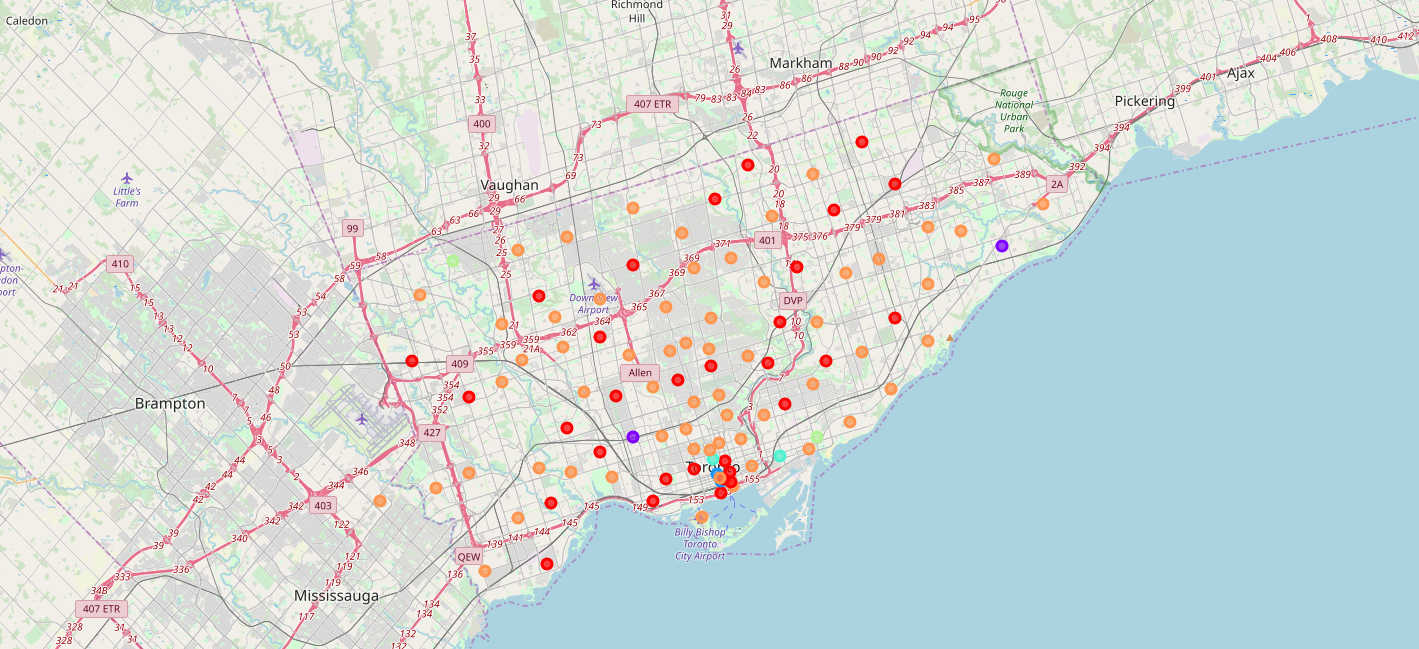

In [30]:
Image(filename='toronto_clusters.png')

## 5. Discussion

Relocating to a different city may involve significant increases in time, expense, and stress, especially if the person were not familiar with the new area. This project assumed the individual’s previous location reflected those amenities they enjoyed and would like to maintain as closely as possible at their new residence. As such, this project was developed to answer the question, “How do I travel to a new city and find a neighborhood in which to live that offers similar comforts and amenities to the one I left?”

As this project represented a case of unsupervised learning, I entered the analysis without any preconceived notions regarding the outcome. Not wanting to subject my findings to any conscious or subconscious bias, I relied on the k-means machine learning algorithm to provide objective/quantitative results. My focus was to provide a logical methodology that would provide a feasible solution.

The process itself is relatively straightforward. First, find the top 10 venue categories in the person’s current neighborhood, using the East Village as an example. Second, find the top 10 venue categories in the neighborhoods within the City of Toronto. Third, insert the East Village neighborhoods with those of Toronto, so it will be included in the clustering process. Fourth, run the k-means procedure to cluster the neighborhoods. Fifth, examine the resulting clusters to determine which one contains the East Village. This cluster displays those neighborhoods the individual should investigate for potential relocation.

My primary observation regarding the results is that more neighborhoods (62) were returned than I had hoped. While some of the neighborhoods were filtered, many more remained. One way to improve the results may be to include a procedure to find the optimum number of “k” for the algorithm to utilize. I did try several different settings; however, none appeared to make a significant difference to my results. Still, it’s an area to investigate, as it would make the process less qualitative.

Another approach may involve using an alternative clustering algorithm, such as Mean-Shift Clustering, Density-Based Spatial Clustering of Applications, Expectation–Maximization (EM) Clustering, or Agglomerative Hierarchical Clustering. While all may not be appropriate for this exercise, alternatives are available that may warrant investigation.

One future enhancement to this analysis could include the introduction of venue quality. By adding a quality component, the relative merits of establishments between neighborhoods could be compared. This addition would allow rankings to include both the number of venues within neighborhood categories, as well as their level of customer satisfaction.

With respect to answering the business problem, it may be found by examining the clusters returned by the k-means algorithm. We see the originating neighborhood of East Village is included in Cluster 5 along with similar neighborhoods in Toronto. As such, these are the neighborhoods in Toronto the subject should examine as possible relocation sites. In this case, there appears to be a large selection of candidates. 


## 6. Conclusion

This project offers a systematic and reproducible approach utilizing a quantitative based methodology to compare the neighborhood of one city to those of another. As such, it provides a beginning step for those looking to relocate and defines a list of possible relocation sites before one even leaves home, potentially saving them both time and money.

[The code for this project may be found here.](https://github.com/MichaelMossPhD/Coursera_Capstone/blob/master/IBM%20Capstone%20Project%20-%20Code.ipynb)